# Recognizing clothing items with convolutional neural networks

In this mini project, I run a simple convolutional neural network (CNN) model on the [Fashion MNIST dataset](https://www.kaggle.com/zalando-research/fashionmnist) by Zalando. The dataset consists of 28x28 grayscale images of clothing items, each associated with a label from 10 classes. The training set has 60,000 and the test set has 10,000 examples. The dataset serves as a benchmark for many compouter vision tasks, as an alternative to MNIST. I will use it to build my first CNN model. 

I will be using keras to build the CNN model. First, let's import the relevant packages, and load the data.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical

In [3]:
train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In this dataset, each row represents an image. The pixel columns indicate the darkness of the pixel (1 to 255). Column 1 is the class label. Each training and test example is assigned to one of the following labels:
  * 0 T-shirt/top
  * 1 Trouser
  * 2 Pullover
  * 3 Dress
  * 4 Coat
  * 5 Sandal
  * 6 Shirt
  * 7 Sneaker
  * 8 Bag
  * 9 Ankle boot
  
Let's store any additional information we have on the data:

In [4]:
img_rows=28
img_cols=28

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = 10

And let us display some examples of the images. I will plot out a few randomly selected examples from each class.

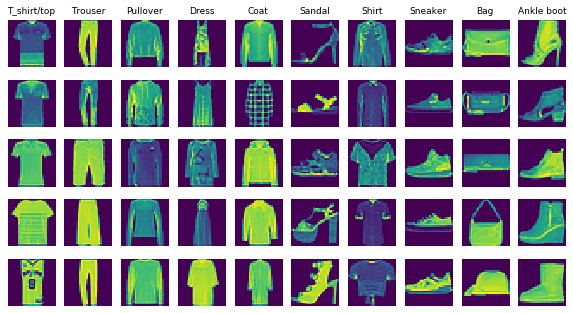

In [6]:
num_examples=5
num_obs = len(train_df) # get the length of the train dataset

fig, axes = plt.subplots(num_examples, num_classes, figsize = (10,10))

for label_ind in range(num_classes): # loop through each class
    
    label = class_names[label_ind] # get label

    # randomly sample items of this class
    examples_with_label=train_df[train_df.label==label_ind].sample(num_examples)    
    examples_with_label=np.array(examples_with_label, dtype = 'float32')
    
    # display label as title on top 
    axes[0,label_ind].set_title(label, fontsize = 9)
    # display examples in a column
    for i in range(num_examples):
        axes[i,label_ind].imshow( examples_with_label[i,1:].reshape((28,28)) )
        axes[i,label_ind].axis('off')

plt.subplots_adjust(top=1.2,bottom=0.8)

Now we need to transform the data into a suitable format for keras:

  1. We need numpy arrays instead of a pandas dataframe
  2. We have to further split the (training) data into a training set and a validation set
  3. We have to transform the arrays representing images into 2D tensors (matrices)
  4. Neural networks converge slower if the image pixel values are on their original [0-255] range. Therefore we have to scale them to have [0-1] range.

In [7]:
# Getting Numpy arrays from our dataframe
X = np.array(train_df.iloc[:, 1:])
y = to_categorical(np.array(train_df.iloc[:, 0]))

X_test = np.array(test_df.iloc[:, 1:])
y_test = to_categorical(np.array(test_df.iloc[:, 0]))

# Split the data into a training set and a validation set to optimize our classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=24)

# Reshape images from arrays to matrices
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

# Rescaling pixel values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

Finally, we need to build up the neural network architecture. I use the same architecture used in [this Kaggle notebook](https://www.kaggle.com/bugraokcu/cnn-with-keras). 

In [9]:
batch_size = 256
epochs = 50

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_rows,img_cols,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

In [11]:
# Train the model:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 41s 847us/step - loss: 0.8644 - accuracy: 0.6764 - val_loss: 0.5152 - val_accuracy: 0.8108
Epoch 2/50
48000/48000 [==============================] - 43s 890us/step - loss: 0.5265 - accuracy: 0.8027 - val_loss: 0.4372 - val_accuracy: 0.8340
Epoch 3/50
48000/48000 [==============================] - 35s 735us/step - loss: 0.4518 - accuracy: 0.8341 - val_loss: 0.3668 - val_accuracy: 0.8665
Epoch 4/50
48000/48000 [==============================] - 40s 828us/step - loss: 0.4074 - accuracy: 0.8515 - val_loss: 0.3451 - val_accuracy: 0.8732
Epoch 5/50
48000/48000 [==============================] - 40s 838us/step - loss: 0.3737 - accuracy: 0.8652 - val_loss: 0.3160 - val_accuracy: 0.8848
Epoch 6/50
48000/48000 [==============================] - 39s 819us/step - loss: 0.3487 - accuracy: 0.8734 - val_loss: 0.3001 - val_accuracy: 0.8906
Epoch 7/50
48000/48000 [==============================]

In [57]:
predicted_classes = model.predict_classes(X_test) # getting a class prediction
predicted_probs=np.max(model.predict(X_test),axis=1) # getting the predicted probability for the predicted class

y_test_df = test_df.iloc[:, 0]

correct = np.where(predicted_classes==y_test_df)[0] #indices of correct predictions
incorrect = np.where(predicted_classes!=y_test_df)[0] #indices of incorrect predictions

# print a classification report
print(classification_report(y_test_df, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.89      0.87      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.89      0.90      0.89      1000
     Class 3       0.94      0.93      0.93      1000
     Class 4       0.91      0.87      0.89      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.79      0.78      0.79      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



The model achieves an overall accuracy of 93%. Looking at the breakdown, it is clear that some classes are harder to predict than others: Class 1 (trousers) have 99% accuracy, while Class 6 (shirts) only has 79%. There is not a drastic difference between precision and recall. 

Now let's look at a few misclassified examples:

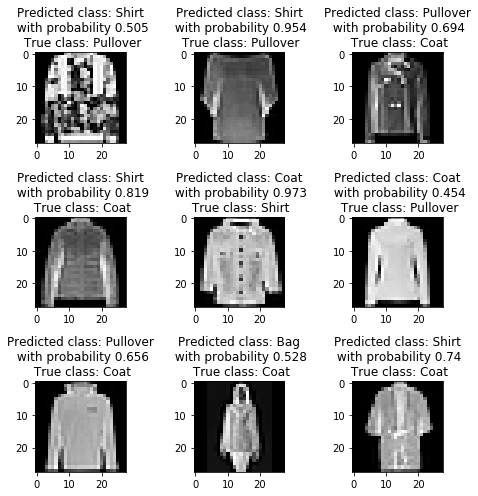

In [72]:
plt.figure(figsize=(7,7))
for i, incorrect_index in enumerate(incorrect[0:9]):
    pred_class=class_names[predicted_classes[incorrect_index]]
    pred_prob=round(predicted_probs[incorrect_index],3)
    true_class=class_names[y_test_df[incorrect_index]]
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect_index].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted class: "+pred_class+"\n with probability "+str(pred_prob)+"\n True class: "+true_class)
    plt.tight_layout()

We can see that in some cases the model is rather confident in it's prediction, as implied by the high estimated probability of belonging to a class, for example in the case of the middle items of the first second row. However, in most cases the predicted probabilities are lower.

Now for a final illustration:

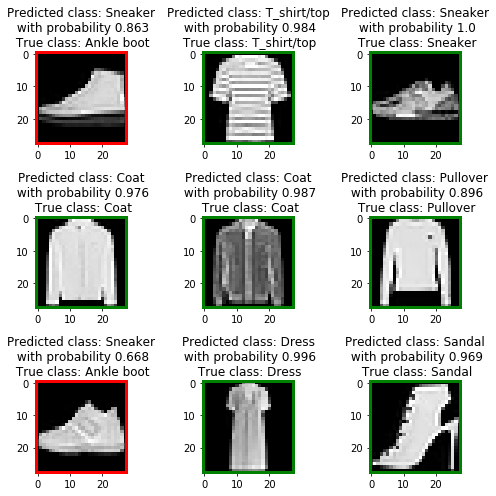

In [116]:
plt.rcParams['axes.linewidth'] = 3

#plt.figure(figsize=(7,7))
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(7,7),linewidth=4)
axes=axes.reshape(-1)

for i, index in enumerate(np.random.randint(0,10000,9)):
    if index in incorrect:
        color="red"
    else:
        color="green"
    pred_class=class_names[predicted_classes[index]]
    pred_prob=round(predicted_probs[index],3)
    true_class=class_names[y_test_df[index]]
    #plt.subplot(4,4,i+1)
    axes[i].imshow(X_test[index].reshape(28,28), cmap='gray', interpolation='none')
    axes[i].title.set_text("Predicted class: "+pred_class+"\n with probability "+str(pred_prob)+"\n True class: "+true_class)
    axes[i].spines["bottom"].set_color('red')
    plt.setp(axes[i].spines.values(), color=color)
    plt.tight_layout()
    
plt.savefig("Fashion-MNIST-illustration.png")

We conclude that this simple CNN model run in under half an hour on a laptop can be quite accurate in recognizing clothing items. 

### References 
* https://www.kaggle.com/bugraokcu/cnn-with-keras
* https://www.kaggle.com/pavansanagapati/a-simple-cnn-model-beginner-guide
* https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF